<a href="https://colab.research.google.com/github/Navd15/mnist-fashion/blob/main/MNIST-Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from tensorflow import keras
import numpy as np

In [4]:
(X_train_full, y_train_full), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [8]:
class_names[y_train[0]]

'Coat'

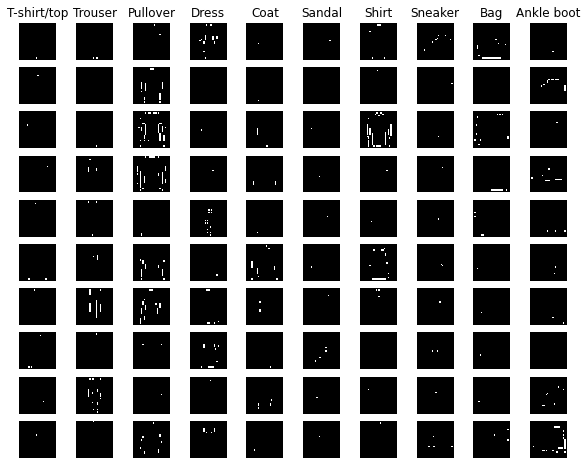

In [12]:
num_classes = len(class_names)
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs,10, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(10, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [16]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7182 - accuracy: 0.7652 - val_loss: 0.5279 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4899 - accuracy: 0.8299 - val_loss: 0.4788 - val_accuracy: 0.8298
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4447 - accuracy: 0.8439 - val_loss: 0.4107 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4158 - accuracy: 0.8549 - val_loss: 0.4037 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3941 - accuracy: 0.8614 - val_loss: 0.3894 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3782 - accuracy: 0.8664 - val_loss: 0.3986 - val_accuracy: 0.8586
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3653 - accuracy: 0.8703 - val_loss: 0.3634 - val_accuracy:

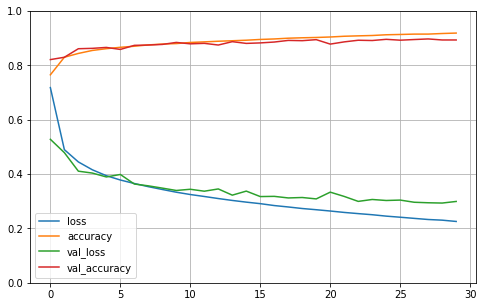

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 67.4947 - accuracy: 0.8422


[67.49470520019531, 0.842199981212616]

In [20]:
pred_probs=model.predict(X_test[:3])

In [37]:
pred_probs.argmax(axis=1)

array([9, 2, 1])

In [34]:
pred_class=np.array(class_names)[pred_probs.argmax(axis=1)]

In [35]:
pred_class

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')